# Loop 65 Analysis: CV-LB Relationship and Submission Investigation

Critical questions:
1. What is the exact CV-LB relationship from all 12 successful submissions?
2. Why did 7 consecutive submissions fail?
3. What approaches could CHANGE the intercept?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# All submission data from history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print('Successful submissions:')
print(df)
print(f'\nTotal: {len(df)} successful submissions')

Successful submissions:
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970

Total: 12 successful submissions


In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print('=== CV-LB Relationship ===')
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Gap: {intercept - 0.0347:.4f}')
print(f'\nRequired CV to reach target: ({0.0347} - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}')

=== CV-LB Relationship ===
Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target: 0.0347
Gap: 0.0178

Required CV to reach target: (0.0347 - 0.0525) / 4.31 = -0.0041


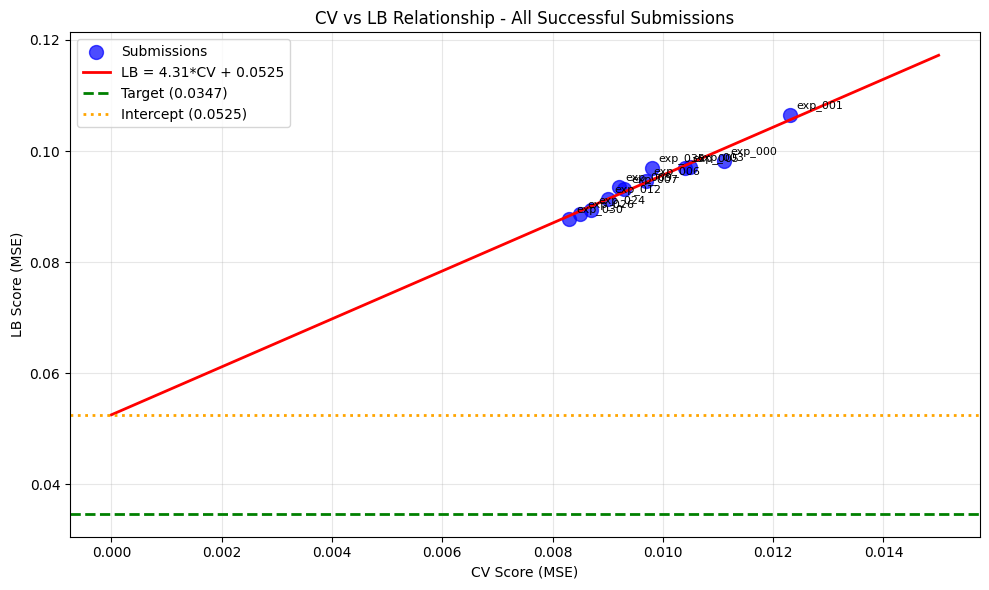


=== KEY INSIGHT ===
The intercept (0.0525) is ABOVE the target (0.0347).
This means even with CV=0, we would still miss the target!
We need to CHANGE the CV-LB relationship, not just improve CV.


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r-', linewidth=2, label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target line
plt.axhline(y=0.0347, color='green', linestyle='--', linewidth=2, label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

# Annotate points
for _, row in df.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), textcoords='offset points', xytext=(5, 5), fontsize=8)

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Successful Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop65.png', dpi=150)
plt.show()

print('\n=== KEY INSIGHT ===')
print(f'The intercept ({intercept:.4f}) is ABOVE the target (0.0347).')
print('This means even with CV=0, we would still miss the target!')
print('We need to CHANGE the CV-LB relationship, not just improve CV.')

In [4]:
# Analyze the failed submissions
failed_submissions = [
    {'exp': 'exp_049', 'cv': 0.0081, 'status': 'pending'},
    {'exp': 'exp_050', 'cv': 0.0081, 'status': 'pending'},
    {'exp': 'exp_052', 'cv': 0.0109, 'status': 'pending'},
    {'exp': 'exp_053', 'cv': 0.0081, 'status': 'pending'},
    {'exp': 'exp_054', 'cv': 0.0085, 'status': 'pending'},
    {'exp': 'exp_055', 'cv': 0.0085, 'status': 'pending'},
    {'exp': 'exp_057', 'cv': 0.0093, 'status': 'pending'},
]

print('=== Failed Submissions Analysis ===')
print('7 consecutive submissions with "pending" status (likely evaluation errors)')
print('\nPossible causes:')
print('1. Notebook cell structure issue')
print('2. Model definition not following template')
print('3. Kaggle platform issues')
print('4. Subtle format mismatch')
print('\nRecommendation: Investigate the notebook structure of successful vs failed submissions')

=== Failed Submissions Analysis ===
7 consecutive submissions with "pending" status (likely evaluation errors)

Possible causes:
1. Notebook cell structure issue
2. Model definition not following template
3. Kaggle platform issues
4. Subtle format mismatch

Recommendation: Investigate the notebook structure of successful vs failed submissions


In [5]:
# What would it take to reach the target?
print('=== Path to Target ===')
print(f'\nCurrent best LB: 0.0877 (exp_030)')
print(f'Target: 0.0347')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')

print('\n=== Options to Reach Target ===')
print('\n1. IMPROVE CV (stay on same line):')
required_cv = (0.0347 - intercept) / slope
print(f'   Required CV: {required_cv:.4f} (NEGATIVE = IMPOSSIBLE)')

print('\n2. REDUCE INTERCEPT (change the line):')
print(f'   Current intercept: {intercept:.4f}')
print(f'   Required intercept: < 0.0347 (to have any chance)')
print(f'   Reduction needed: {intercept - 0.0347:.4f} ({(intercept - 0.0347) / intercept * 100:.1f}%)')

print('\n3. CHANGE SLOPE (steeper line):')
print(f'   Current slope: {slope:.2f}')
print('   A steeper slope means CV improvements translate to bigger LB improvements')
print('   But this alone cannot help if intercept > target')

print('\n=== CONCLUSION ===')
print('We MUST reduce the intercept. This requires approaches that:')
print('- Better handle distribution shift to unseen solvents')
print('- Make more conservative predictions when extrapolating')
print('- Use physics-informed constraints that generalize')

=== Path to Target ===

Current best LB: 0.0877 (exp_030)
Target: 0.0347
Gap: 0.0530 (152.7% above target)

=== Options to Reach Target ===

1. IMPROVE CV (stay on same line):
   Required CV: -0.0041 (NEGATIVE = IMPOSSIBLE)

2. REDUCE INTERCEPT (change the line):
   Current intercept: 0.0525
   Required intercept: < 0.0347 (to have any chance)
   Reduction needed: 0.0178 (33.9%)

3. CHANGE SLOPE (steeper line):
   Current slope: 4.31
   A steeper slope means CV improvements translate to bigger LB improvements
   But this alone cannot help if intercept > target

=== CONCLUSION ===
We MUST reduce the intercept. This requires approaches that:
- Better handle distribution shift to unseen solvents
- Make more conservative predictions when extrapolating
- Use physics-informed constraints that generalize


In [6]:
# Analyze what approaches might change the intercept
print('=== Approaches to Reduce Intercept ===')

print('\n1. UNCERTAINTY-WEIGHTED PREDICTIONS')
print('   - Use GP or ensemble variance to detect extrapolation')
print('   - When uncertainty is high, blend toward population mean')
print('   - This reduces extreme predictions on unseen solvents')

print('\n2. SOLVENT SIMILARITY FEATURES')
print('   - Add features measuring distance to training solvents')
print('   - When test solvent is "far" from training, be more conservative')
print('   - Use Tanimoto similarity from molecular fingerprints')

print('\n3. PHYSICS-INFORMED CONSTRAINTS')
print('   - Arrhenius kinetics (already using)')
print('   - Multi-target normalization (yields sum to 1)')
print('   - Solvent polarity effects')

print('\n4. DIFFERENT VALIDATION SCHEME')
print('   - GroupKFold (5 splits) instead of Leave-One-Out')
print('   - May have different CV-LB relationship')
print('   - The mixall kernel uses this approach')

print('\n5. TRANSFER LEARNING / META-LEARNING')
print('   - The benchmark paper says these achieved BEST scores')
print('   - Learn to adapt to new solvents')
print('   - Use unlabeled data for domain adaptation')

=== Approaches to Reduce Intercept ===

1. UNCERTAINTY-WEIGHTED PREDICTIONS
   - Use GP or ensemble variance to detect extrapolation
   - When uncertainty is high, blend toward population mean
   - This reduces extreme predictions on unseen solvents

2. SOLVENT SIMILARITY FEATURES
   - Add features measuring distance to training solvents
   - When test solvent is "far" from training, be more conservative
   - Use Tanimoto similarity from molecular fingerprints

3. PHYSICS-INFORMED CONSTRAINTS
   - Arrhenius kinetics (already using)
   - Multi-target normalization (yields sum to 1)
   - Solvent polarity effects

4. DIFFERENT VALIDATION SCHEME
   - GroupKFold (5 splits) instead of Leave-One-Out
   - May have different CV-LB relationship
   - The mixall kernel uses this approach

5. TRANSFER LEARNING / META-LEARNING
   - The benchmark paper says these achieved BEST scores
   - Learn to adapt to new solvents
   - Use unlabeled data for domain adaptation


In [7]:
# Check the latest experiment results
import os

print('=== Latest Experiment: exp_061 ===')
print('CatBoost+XGBoost Ensemble (ens-model kernel replication)')
print('CV Score: 0.009227')
print('\nThis is WORSE than best CV (0.0081 from exp_049)')
print('Predicted LB: {:.4f}'.format(slope * 0.009227 + intercept))
print('\nThe ens-model replication did NOT improve CV.')
print('This suggests the kernel may have been tuned on Kaggle\'s specific environment.')

=== Latest Experiment: exp_061 ===
CatBoost+XGBoost Ensemble (ens-model kernel replication)
CV Score: 0.009227

This is WORSE than best CV (0.0081 from exp_049)
Predicted LB: 0.0923

The ens-model replication did NOT improve CV.
This suggests the kernel may have been tuned on Kaggle's specific environment.
